# Imports

In [3]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import json

# Load data

In [48]:
results = {}

for filename in glob.glob("*.json"):
    print(filename)
    
    with open(filename) as f:
        json_content = json.load(f) 
        results[json_content["dataset"]] = json_content

us_roads_NH_False.json
us_roads_VT_False.json
digg_reply_False.json
us_roads_CT_False.json
openflights_False.json
TerroristRel_False.json
marvel_universe_False.json
HepPh_False.json
CondMat_False.json
reddit-hyperlink_False.json
email_enron_False.json
us_roads_AK_False.json
AstroPh_False.json


# Network statistics

## Distribution of nodes and edges

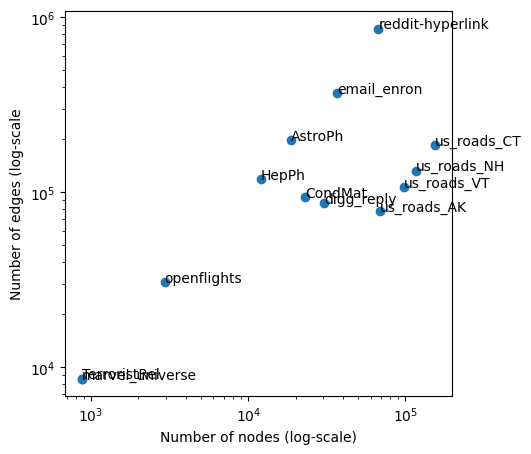

In [49]:
plt.figure(figsize=(5, 5))

nnodes = [results[dataset]["nodes"] for dataset in results.keys()]
nedges = [results[dataset]["edges"] for dataset in results.keys()]

plt.scatter(nnodes, nedges)

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Number of nodes (log-scale)")
plt.ylabel("Number of edges (log-scale")

for index, dataset in enumerate(results.keys()):
    plt.annotate(dataset, (nnodes[index], nedges[index]))
    
plt.show()

# Centrality measures

## Mean topk closeness to closeness centrality computation time ratio across network metrics

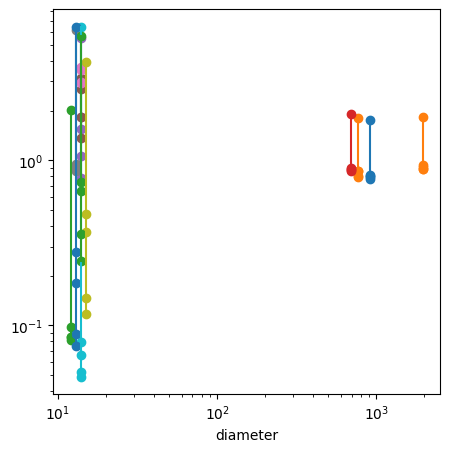

In [58]:
plt.figure(figsize=(5, 5))

ratios = [[results[dataset]["time_elapsed"]["topkcloseness_0"][k]/results[dataset]["time_elapsed"]["closeness"]for k in results[dataset]["time_elapsed"]["topkcloseness_0"].keys()] for dataset in results.keys()]
metric = [results[dataset]["diameter"][0] for dataset in results.keys()]

for index, ratio in enumerate(ratios):
    plt.plot(np.full(len(ratio), metric[index]), ratio)
    plt.scatter(np.full(len(ratio), metric[index]), ratio)

plt.xscale("log")
plt.yscale("log")

plt.xlabel("diameter")
# plt.ylabel()

plt.show()

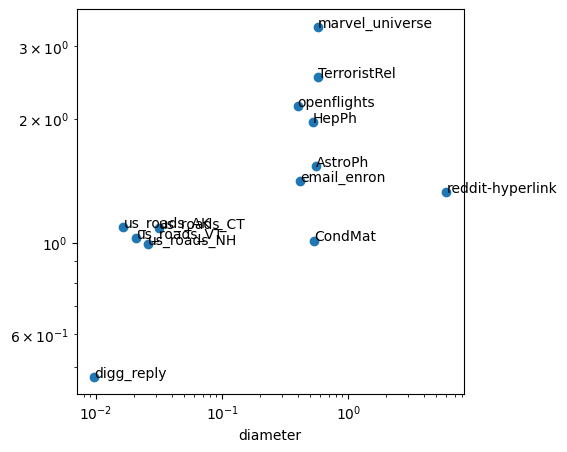

In [71]:
plt.figure(figsize=(5, 5))

ratios = [np.mean([results[dataset]["time_elapsed"]["topkcloseness_0"][k]/results[dataset]["time_elapsed"]["closeness"]for k in results[dataset]["time_elapsed"]["topkcloseness_0"].keys()]) for dataset in results.keys()]
metric = [results[dataset]["average_clustering_coefficient"] for dataset in results.keys()]

plt.scatter(metric, ratios)

plt.xscale("log")
plt.yscale("log")

plt.xlabel("diameter")
# plt.ylabel()

for index, dataset in enumerate(results.keys()):
    plt.annotate(dataset, (metric[index], ratios[index]), annotation_clip=True)
    
plt.show()

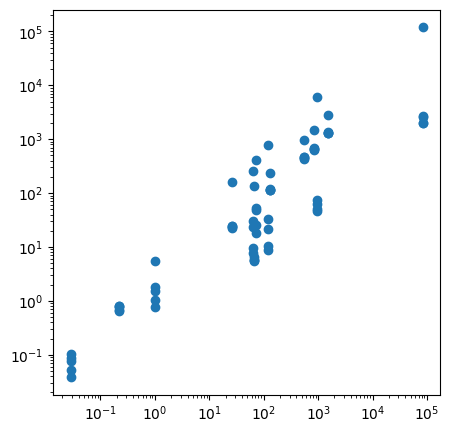

In [40]:
plt.figure(figsize=(5, 5))

closeness = np.array([[results[dataset]["time_elapsed"]["closeness"]for k in results[dataset]["time_elapsed"]["topkcloseness_0"].keys()] for dataset in results.keys()]).flatten()
topk_closeness = np.array([[results[dataset]["time_elapsed"]["topkcloseness_0"][k]for k in results[dataset]["time_elapsed"]["topkcloseness_0"].keys()] for dataset in results.keys()]).flatten()

plt.scatter(closeness, topk_closeness)

plt.xscale("log")
plt.yscale("log")

# for index, dataset in enumerate(results.keys()):
    # plt.annotate(dataset, (ratio[index], metric[index]))
    
plt.show()